# Sprint ゲート付きリカレントニューラルネットワーク

## 0.前提
- GoogleColabで実行
- それぞれ実行したpythonファイルは別に作成　[run_program](https://github.com/satoshi30/diveintocode-ml/tree/master/Term2_DeepLearning/Sprint23/examples/run_program)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/'My Drive'

/content/drive/My Drive


In [ ]:
# !mkdir Sprint23

In [3]:
%cd ./Sprint23

/content/drive/My Drive/Sprint23


## 1.このSprintについて

### Sprintの目的
- 発展的なRNNの手法を理解する
- ドキュメントを網羅的に読む

### どのように学ぶか
Kerasに用意されているRNN関係のレイヤーを動作させながら学んでいきます。

## 2.KerasのRecurrentレイヤー

Kerasには複数のRecurrentレイヤーや、それに関連したクラスが用意されています。今回のSprintではこれら全てを動かした上で、それぞれの役割を説明できる状態を目指します。

以下のドキュメントにまとめられています。

[Recurrentレイヤー - Keras Documentation](https://keras.io/ja/layers/recurrent/)

### 【問題1】各種手法の実行
Kerasには4種類のReccurentレイヤーが用意されています。SimpleRNN以外はゲート付きリカレントニューラルネットワークです。

- SimpleRNN
- GRU
- LSTM
- ConvLSTM2D

これらを実行してください。この中でSimpleRNN、GRU、LSTMは同様のタスクに用いることができるため、精度の比較も行なってください。

Keras公式のサンプルコードを利用してください。

**LSTMのサンプルコード**

[keras/imdb_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py)

**ConvLSTM2Dのサンプルコード**

[keras/conv_lstm.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/conv_lstm.py)

このサンプルコードをそのまま使う必要はなく、ノード数やエポックなどは変更して構いません。全て実行する上での実行時間を考慮した数に設定してください。

In [ ]:
# git sparse checkout で clone せずに一部のサブディレクトリだけを pull/checkout する
# https://mseeeen.msen.jp/git-sparse-checkout/
!git init
!git config core.sparsecheckout true
!git remote add origin https://github.com/keras-team/keras.git
!echo "examples" > .git/info/sparse-checkout
!git pull origin master

Initialized empty Git repository in /content/drive/My Drive/Sprint23/.git/
remote: Enumerating objects: 32151, done.
remote: Total 32151 (delta 0), reused 0 (delta 0), pack-reused 32151
Receiving objects: 100% (32151/32151), 12.89 MiB | 6.92 MiB/s, done.
Resolving deltas: 100% (23408/23408), done.
From https://github.com/keras-team/keras
 * branch              master     -> FETCH_HEAD
 * [new branch]        master     -> origin/master


In [ ]:
!ls -a

examples  .git


In [4]:
!rm -r .git

In [ ]:
%cd examples
!ls -a

/content/drive/My Drive/Sprint23/examples
addition_rnn.py		      lstm_text_generation.py
antirectifier.py	      mnist_acgan.py
babi_memnn.py		      mnist_cnn.py
babi_rnn.py		      mnist_denoising_autoencoder.py
cifar10_cnn.py		      mnist_hierarchical_rnn.py
cifar10_resnet.py	      mnist_irnn.py
class_activation_maps.py      mnist_mlp.py
cnn_seq2seq.py		      mnist_net2net.py
conv_filter_visualization.py  mnist_siamese.py
conv_lstm.py		      mnist_sklearn_wrapper.py
deep_dream.py		      mnist_swwae.py
image_ocr.py		      mnist_transfer_cnn.py
imdb_bidirectional_lstm.py    neural_doodle.py
imdb_cnn_lstm.py	      neural_style_transfer.py
imdb_cnn.py		      pretrained_word_embeddings.py
imdb_fasttext.py	      README.md
imdb_lstm.py		      reuters_mlp.py
lstm_seq2seq.py		      reuters_mlp_relu_vs_selu.py
lstm_seq2seq_restore.py       variational_autoencoder_deconv.py
lstm_stateful.py	      variational_autoencoder.py


In [ ]:
!mkdir run_program

#### SimpleRNNの実行

In [ ]:
# imdb_lstm.pyをもとに、SimpleRNNを実装する
!cp imdb_lstm.py run_program/imdb_simplernn.py

In [ ]:
# LSTM部分をSimpleRNNへ変更
!python run_program/imdb_simplernn.py

2020-10-08 02:05:37.751236: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading data...
25000 train sequences [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5

#### GRUの実行

In [ ]:
# imdb_lstm.pyをもとに、GRUを実装する
!cp imdb_lstm.py run_program/imdb_gru.py

In [ ]:
# LSTM部分をGRUへ変更
!python run_program/imdb_gru.py

2020-10-08 01:06:49.632277: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading data...
25000 train sequences [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5

#### LSTMの実行

In [ ]:
!mv imdb_lstm.py ./run_program

In [ ]:
!python run_program/imdb_lstm.py

2020-10-08 02:26:25.870092: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading data...
25000 train sequences [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5

#### ConvLSTM2Dの実行

In [ ]:
!mv conv_lstm.py ./run_program

In [ ]:
!python run_program/conv_lstm.py

2020-10-08 03:49:17.400018: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-08 03:49:19.206494: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-10-08 03:49:19.232241: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-10-08 03:49:19.232950: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla V100-SXM2-16GB computeCapability: 7.0
coreClock: 1.53GHz coreCount: 80 deviceMemorySize: 15.75GiB deviceMemoryBandwidth: 836.37GiB/s
2020-10-08 03:49:19.232990: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-10-08 03:49:19.236700: I tensorflow/stream_executor/plat

file_name : 1_animate.png


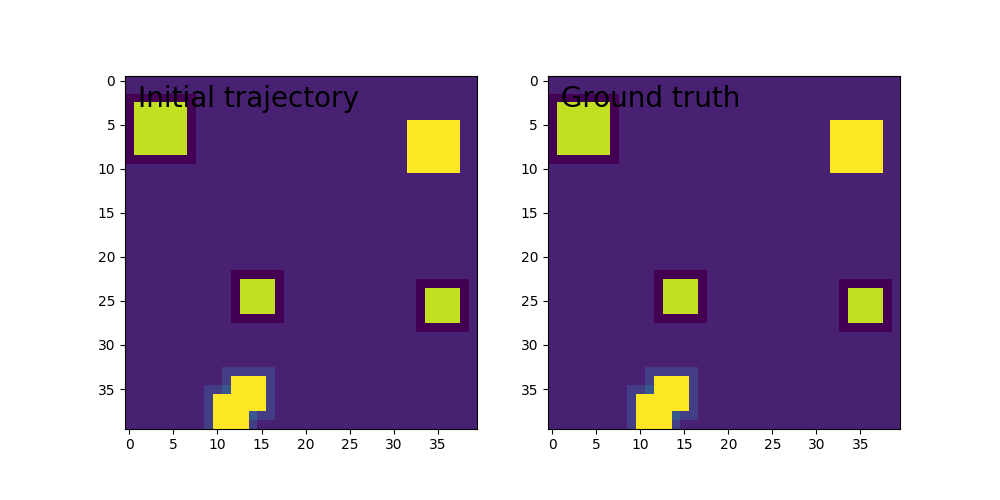

file_name : 2_animate.png


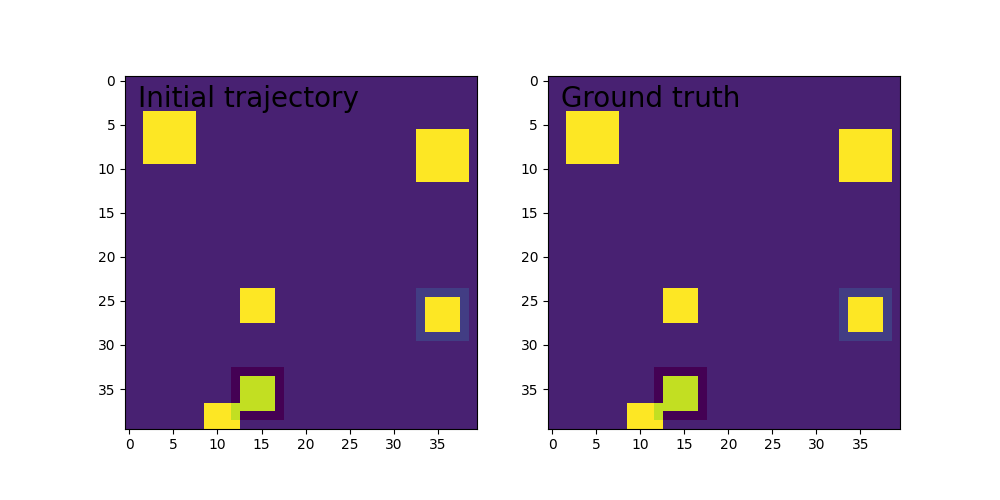

file_name : 3_animate.png


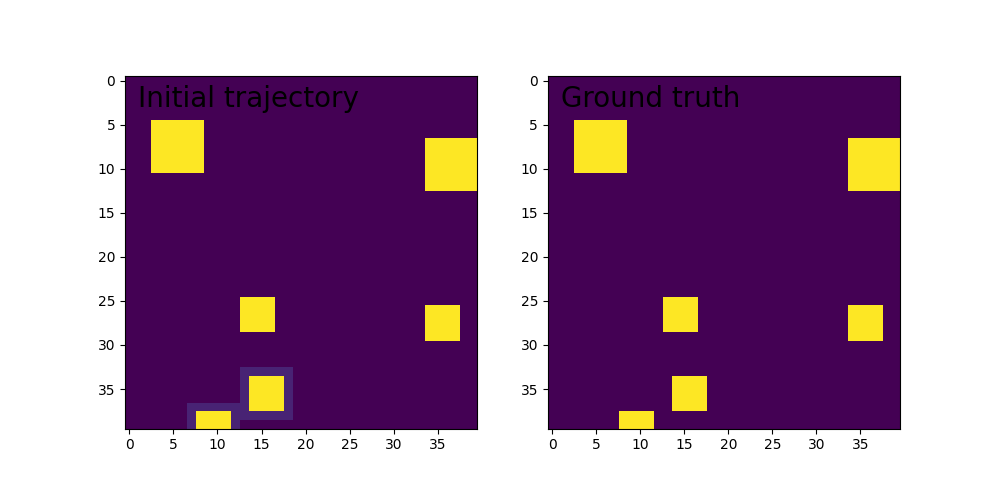

file_name : 4_animate.png


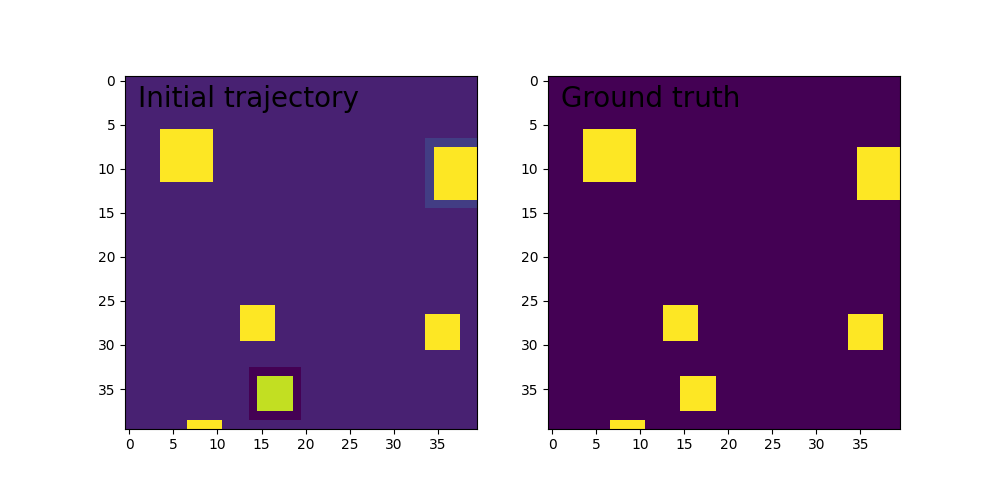

file_name : 5_animate.png


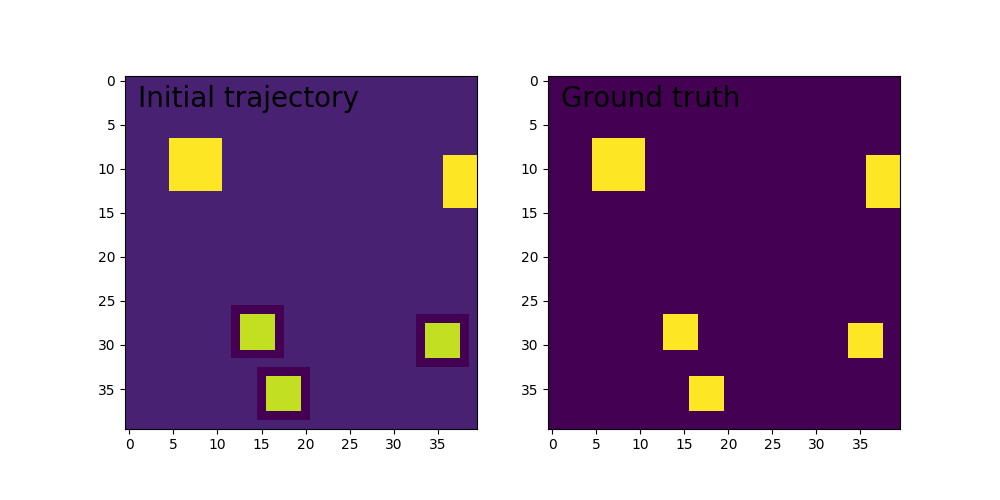

file_name : 6_animate.png


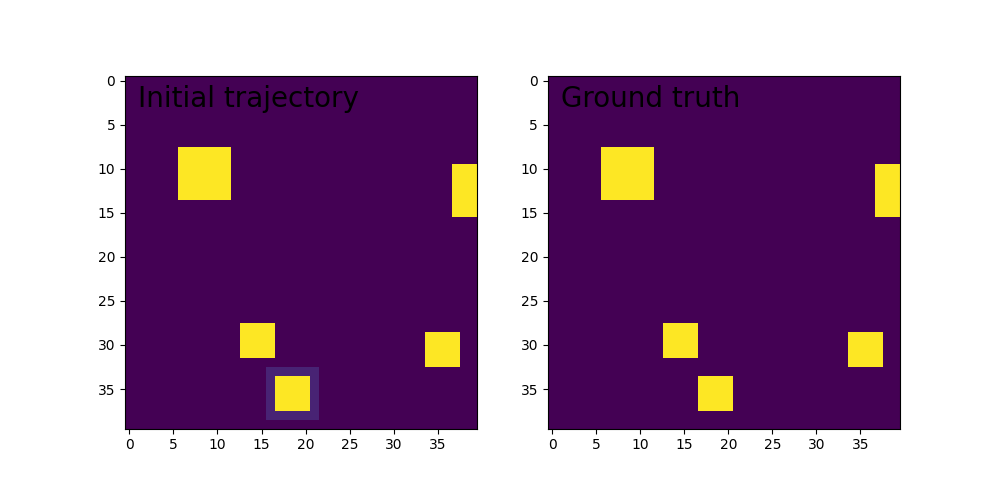

file_name : 7_animate.png


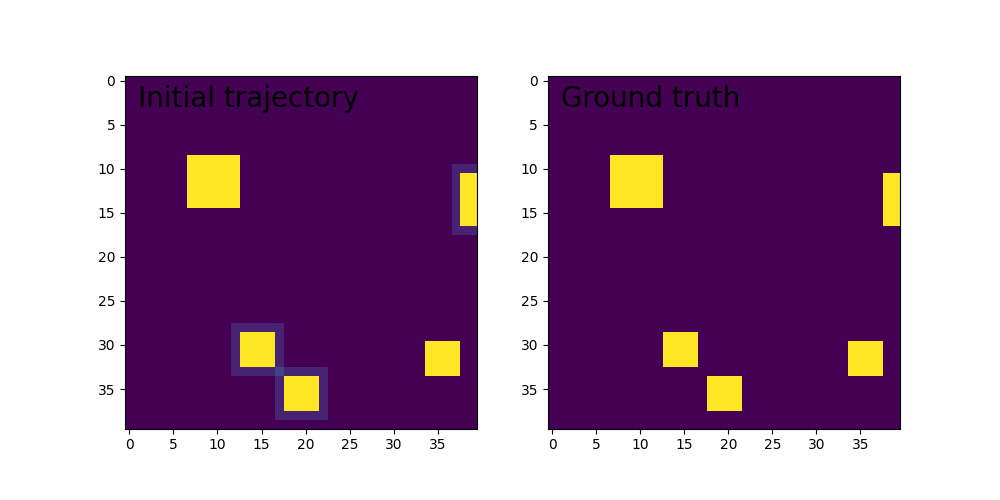

file_name : 8_animate.png


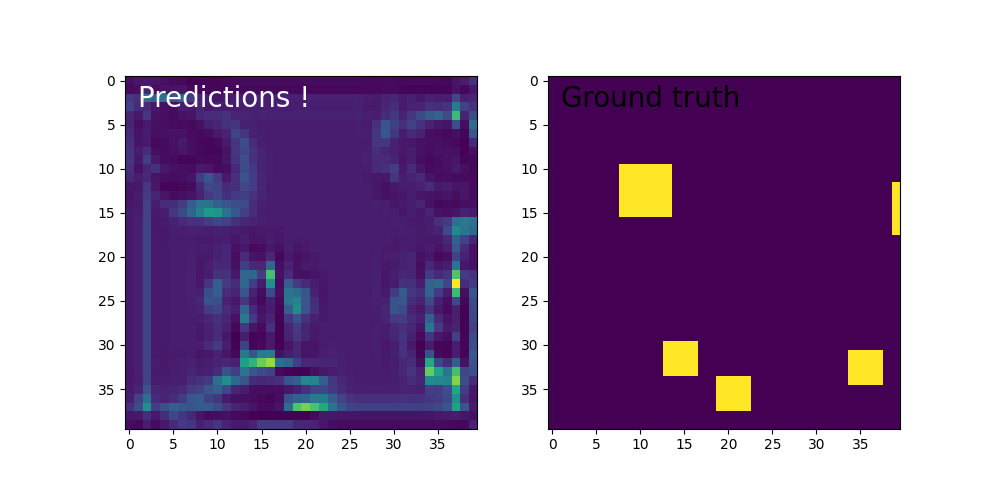

file_name : 9_animate.png


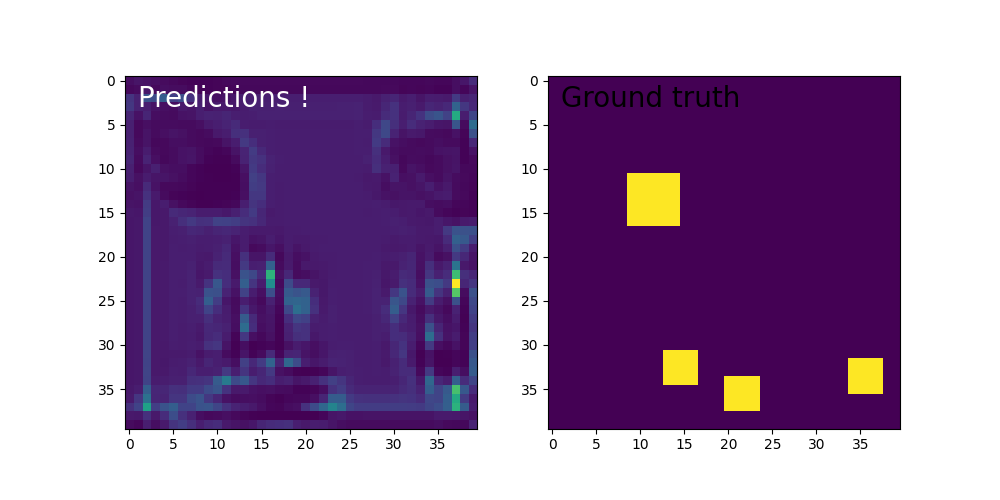

file_name : 10_animate.png


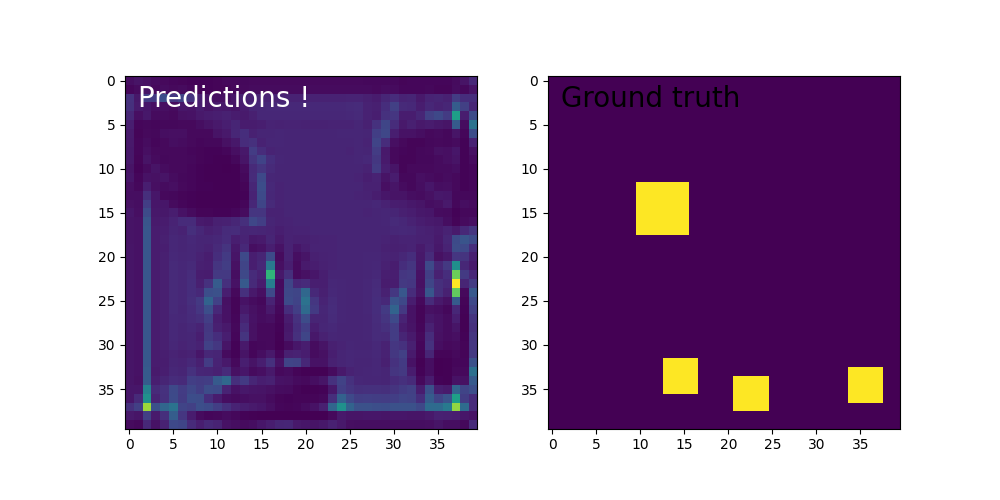

file_name : 11_animate.png


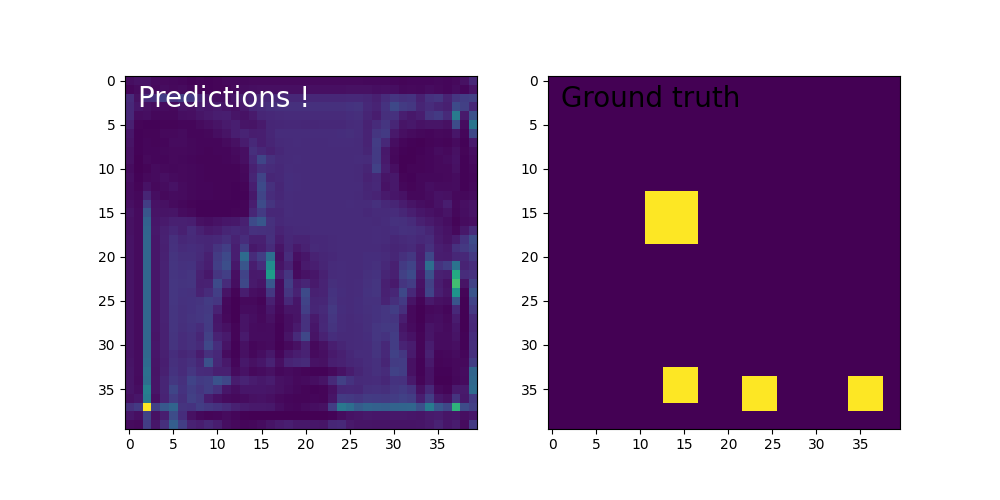

file_name : 12_animate.png


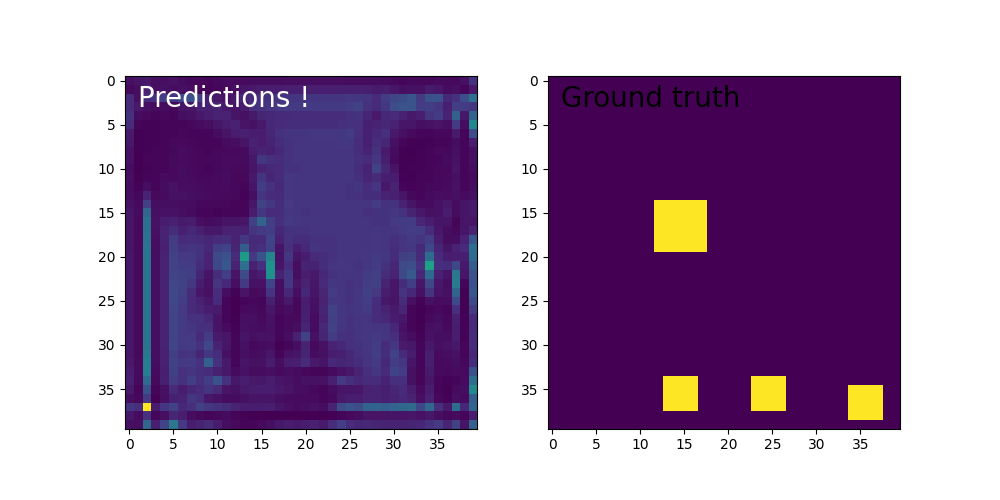

file_name : 13_animate.png


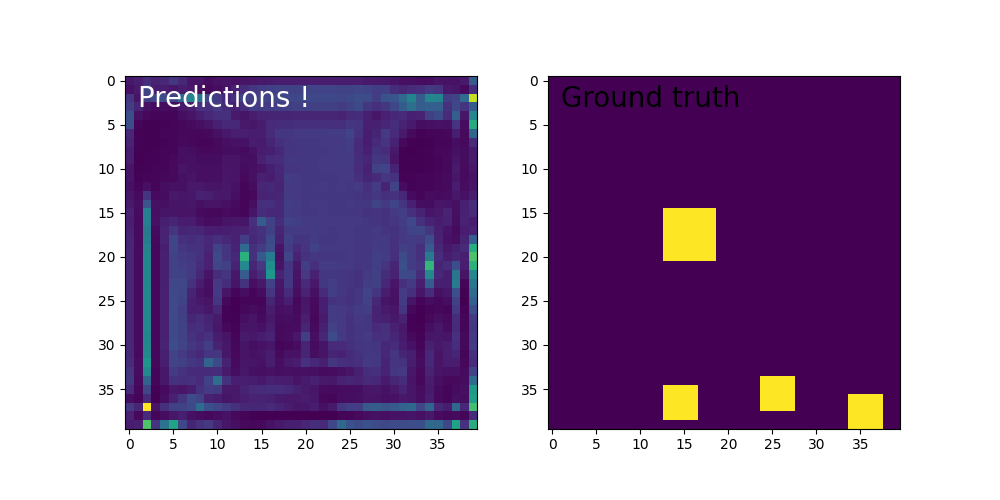

file_name : 14_animate.png


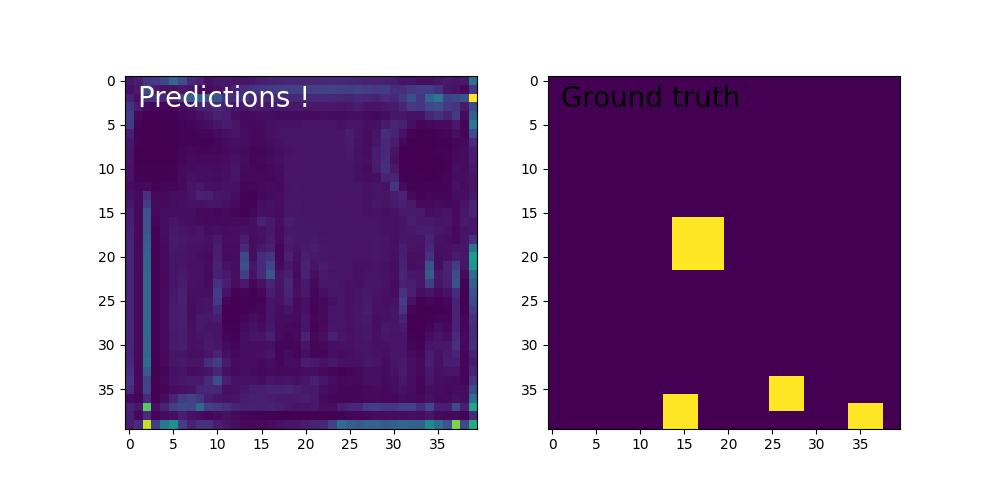

file_name : 15_animate.png


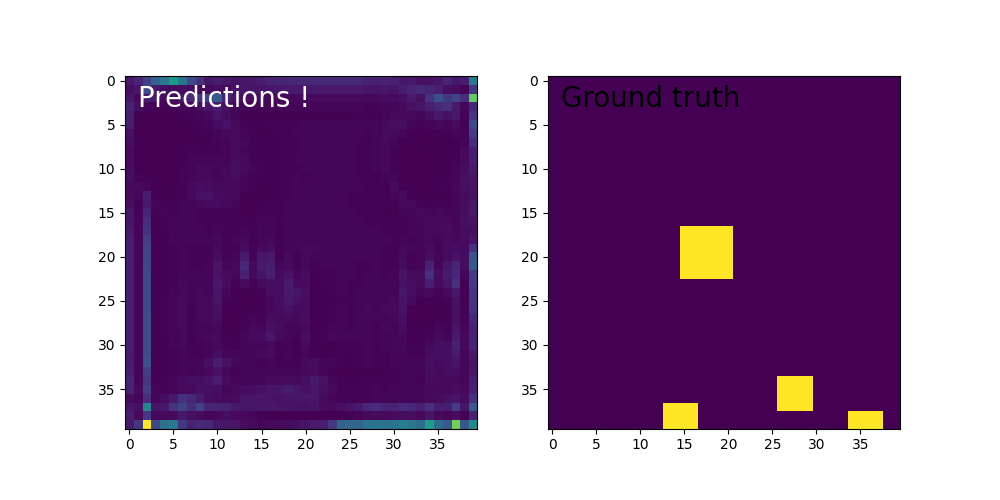

In [ ]:
from IPython.display import Image,display_png
for i in range(1, 16):
  file_name = '{}_animate.png'.format(i)
  print('file_name : {}'.format(file_name))
  display_png(Image(file_name))

### 【問題2】（アドバンス課題）複数のデータセット間での比較
他のデータセットでも実験を行なってください。

[データセット - Keras Documentation](https://keras.io/ja/datasets/#_5)

Kerasで簡単に利用できる自然言語データセットとしてロイターのニュースワイヤー トピックス分類があります。

#### SimpleRNNの実行(reuters_dataset)

In [ ]:
# SimpleRNNにてreutersデータを入力とする
# imdb_simplernn.pyをもとに、reuters_simplernn.pyを作成
!cp run_program/imdb_simplernn.py run_program/reuters_simplernn.py

In [ ]:
# ラベルデータが46ラベルある、one_hot処理
# 全結合層をラベル数分の出力とし、activationをsoftmax
# lossを'categorical_crossentropy'で計算
!python run_program/reuters_simplernn.py

2020-10-08 07:38:29.253437: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading data...
8982 train sequences [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
2246 test sequences [1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20

#### GRUの実行(reuters_dataset)

In [ ]:
# GRUにてreutersデータを入力とする
# imdb_gru.pyをもとに、reuters_gru.pyを作成
!cp run_program/imdb_gru.py run_program/reuters_gru.py

In [ ]:
# ラベルデータが46ラベルある、one_hot処理
# 全結合層をラベル数分の出力とし、activationをsoftmax
# lossを'categorical_crossentropy'で計算
!python run_program/reuters_gru.py

2020-10-08 07:45:32.934354: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading data...
8982 train sequences [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
2246 test sequences [1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20

#### LSTMの実行(reuters_dataset)

In [ ]:
# LSTMにてreutersデータを入力とする
# imdb_lstm.pyをもとに、reuters_lstm.pyを作成
!cp run_program/imdb_lstm.py run_program/reuters_lstm.py

In [ ]:
# ラベルデータが46ラベルある、one_hot処理
# 全結合層をラベル数分の出力とし、activationをsoftmax
# lossを'categorical_crossentropy'で計算
!python run_program/reuters_lstm.py

2020-10-08 06:13:43.268175: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Loading data...
8982 train sequences [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
2246 test sequences [1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 18292, 159, 9, 1084, 363, 13, 19231, 71, 9, 16273, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 16273, 7, 748, 48, 9, 19231, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20

### 【問題3】他のクラスの説明

ドキュメントには他にも関連するクラスが記載されています。それらがどういうものなのかを説明してください。この中には実際に扱うことは少ないクラスも含まれています。

- RNN
- SimpleRNNCell
- GRUCell
- LSTMCell
- StackedRNNCells
- CuDNNGRU
- CuDNNLSTM

#### 参照したドキュメント
- [各クラスのソースコード](https://github.com/tensorflow/tensorflow/blob/73ded7cd0e3a60c6ac7c270dfbf3f2d2ce4161fb/tensorflow/python/keras/layers/recurrent.py)
- [TensorFlow
学ぶ
TensorFlow Core
ガイド
Kerasを使用したリカレントニューラルネットワーク（RNN）](https://www.tensorflow.org/guide/keras/rnn)

#### RNN [公式API](https://www.tensorflow.org/api_docs/python/tf/keras/layers/RNN)
- 引数にcellのオブジェクトをとる
- cellの出力を自ら定義してRNNクラスを生成することで、自分で定義したRNN層を構築できる
- 公式APIのExamples:の例がわかりやすい

#### SimpleRNNCell [公式API](https://www.tensorflow.org/api_docs/python/tf/keras/layers/SimpleRNNCell)
- 組み込みのkeras.layers.SimpleRNNのタイムシーケンスの1つのステップ（cell）で使われているlayersクラス

#### GRUCell [公式API](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRUCell)
- 組み込みのkeras.layers.GRUのタイムシーケンスの1つのステップ（cell）で使われているlayersクラス

#### LSTMCell [公式API](https://www.tensorflow.org/api_docs/python/tf/keras/layers/GRUCell)
- 組み込みのkeras.layers.LSTMのタイムシーケンスの1つのステップ（cell）で使われているlayersクラス

#### StackedRNNCells [公式API](https://www.tensorflow.org/api_docs/python/tf/keras/layers/StackedRNNCells)
- タイムシーケンスの複数cellをスタック化し、単一のセルとして動作できるようにするラッパー
- 引数にはcellのリストをとり、何かしらのRNN層に入力することで、単一のセルとして動作できるようになる
- Wrapper allowing a stack of RNN cells to behave as a single cell.

#### CuDNNGRU　[tf.compat.v1.keras.layers.CuDNNGRU](https://www.tensorflow.org/api_docs/python/tf/compat/v1/keras/layers/CuDNNGRU)
#### CuDNNLSTM [tf.compat.v1.keras.layers.CuDNNLSTM](https://www.tensorflow.org/api_docs/python/tf/compat/v1/keras/layers/CuDNNLSTM)
- 2つとも、TensorFlow1.0の時の実装で、GRU、LSTMをGPU上で作動させることができた
  - 通常のクラスはCPU、CuDNN...クラスはGPUと分けられていた
- TensorFlow2.0からは、通常クラスに統合され、環境が満たされている場合はGPUがデフォルトとなっている。
  - TensorFlowのバージョンによって使い分けできれば問題ない

## その他[RNN教材](https://docbase.io/posts/1560677/sharing/0b4f6385-4c15-4c15-ac78-1cbb42d498f7)